Group: Kayla Yanos and Jing Ting Zheng

## Final Assignment Overview: Working with Patient Records and Encounter Notes

In this final assignment, we’ll focus on patient records related to COVID-19 encounters. Our task is to analyze, process, and transform the data while applying the concepts we’ve covered throughout this course. Here's a detailed breakdown of the assignment:

What Are Encounter Notes?
An encounter note is a record that captures details about a patient’s visit with a doctor. It includes both structured and semi-structured information that is crucial for understanding the context of the visit. Here’s what an encounter note typically looks like:

```
AMBULATORY ENCOUNTER NOTE
Date of Service: March 2, 2020 15:45-16:30

DEMOGRAPHICS:
Name: Jeffrey Greenfelder
DOB: 1/16/2005
Gender: Male
Address: 428 Wiza Glen Unit 91, Springfield, Massachusetts 01104
Insurance: Guardian
MRN: 055ae6fc-7e18-4a39-8058-64082ca6d515

PERTINENT MEDICAL HISTORY:
- Obesity

Recent Visit: Well child visit (2/23/2020)
Immunizations: Influenza vaccine (2/23/2020)

Recent Baseline (2/23/2020):
Height: 155.0 cm
Weight: 81.2 kg
BMI: 33.8 kg/m² (99.1th percentile)
BP: 123/80 mmHg
HR: 92/min
RR: 13/min

SUBJECTIVE:
Adolescent patient presents with multiple symptoms including:
- Cough
- Sore throat
- Severe fatigue
- Muscle pain
- Joint pain
- Fever
Never smoker. Symptoms began recently.

OBJECTIVE:
Vitals:
Temperature: 39.3°C (102.7°F)
Heart Rate: 131.1/min
Blood Pressure: 120/73 mmHg
Respiratory Rate: 27.6/min
O2 Saturation: 75.8% on room air
Weight: 81.2 kg

Laboratory/Testing:
Comprehensive Respiratory Panel:
- Influenza A RNA: Negative
- Influenza B RNA: Negative
- RSV RNA: Negative
- Parainfluenza virus 1,2,3 RNA: Negative
- Rhinovirus RNA: Negative
- Human metapneumovirus RNA: Negative
- Adenovirus DNA: Negative
- SARS-CoV-2 RNA: Positive

ASSESSMENT:
1. Suspected COVID-19 with severe symptoms
2. Severe hypoxemia requiring immediate intervention
3. Tachycardia (HR 131)
4. High-grade fever
5. Risk factors:
   - Obesity (BMI 33.8)
   - Adolescent age

PLAN:
1. Face mask provided for immediate oxygen support
2. Infectious disease care plan initiated
3. Close monitoring required due to:
   - Severe hypoxemia
   - Tachycardia
   - Age and obesity risk factors
4. Parent/patient education on:
   - Home isolation protocols
   - Warning signs requiring emergency care
   - Return precautions
5. Follow-up plan:
   - Daily monitoring during acute phase
   - Virtual check-ins as needed

Encounter Duration: 45 minutes
Encounter Type: Ambulatory
Provider: ID# e2c226c2-3e1e-3d0b-b997-ce9544c10528
Facility: 5103c940-0c08-392f-95cd-446e0cea042a
```


The enocuter contains

* General encounter information:

  * When the encounter took place: Date and time of the visit.
  * Demographics: Patient’s age, gender, and unique medical record identifier.
  * Encounter details: The reason for the visit, diagnosis, and any associated costs.


* Semi-Structured Notes:

These notes mirror how doctors organize their thoughts and observations during an encounter. They generally follow a SOAP format:

* Subjective: The patient’s subjective description of their symptoms, feelings, and medical concerns.
* Objective: The doctor’s objective findings, including test results, measurements, or physical examination outcomes.
* Assessment: The doctor’s evaluation or diagnosis based on subjective and objective information.
* Plan: The proposed treatment plan, including medications, follow-ups, or other interventions.

While some encounter notes might include additional details, the majority conform to this semi-structured format, making them ideal for analysis and transformation.

* Goals for the Assignment

1. Transforming Encounter Notes:

Using an LLM to convert semi-structured encounter notes into a JSON format that organizes the information into structured fields. The JSON will include details such as demographics, encounter specifics, and the SOAP components of the note. Subsequently, you will need to transform the JSON data into a Parquet file, which is not only suitable for analysis in Spark but also ideal for storage later.
Here we will use the ML classificaition to assing the objective and assessment semi-structured fields into standardized, structured fields. The medical taxonomy for this task will be the one provided by the CDC, which defines standard codes for diagnoses, symptoms, procedures, and treatments. This step ensures the structured data aligns with domain-wide medical standards, making it interoperable and ready for deeper analysis.

The JSON format should capture the hierachies described in the structure below.




2. Basic Analytics and Visualizations:
Using Apache Spark, perform comprehensive data analysis on the encounter data and create visualizations that reveal meaningful patterns. Your analysis must include:
- COVID-19 Case Demographics: Case breakdown by age ranges ([0-5], [6-10], [11-17], [18-30], [31-50], [51-70], [71+])
- Cumulative case count of Covid between the earliest case observed in the dataset and last case observed
- Symptoms for all COVID-19 patients versus patients that admitted into the intensive care unit due to COVID.
- Rank medications by frequency of prescription
- Analyze medication patterns across different demographic groups (e.g., top 3 per age group)
- Identify and plot co-morbidity information from the patient records (e.g., hypertension, obesity, prediabetes, etc.) provided in the dataset.
- An independent group analysis: You need to develop and execute THREE original analyses that provide meaningful insights about COVID-19 patterns in this dataset. For each analysis:
  - Clearly state your analytical question/hypothesis
  - Justify why this analysis is valuable
  - Show your Spark code and methodology
  - Present results with appropriate visualizations


In [ ]:
# EncounterType:
#     code
#     description

# Encounter:
#     date
#     time
#     provider_id
#     facility_id

# Address:
#     city
#     state

# Demographics:
#     name
#     date_of_birth
#     age
#     gender
#     address: Address
#     insurance

# Condition:
#     code
#     description

# Medication:
#     code
#     description

# Immunization:
#     code
#     description
#     date: date

# VitalMeasurement:
#     code
#     value: float
#     unit

# BloodPressure:
#     systolic: VitalMeasurement
#     diastolic: VitalMeasurement

# CurrentVitals:
#     temperature: VitalMeasurement
#     heart_rate: VitalMeasurement
#     blood_pressure: BloodPressure
#     respiratory_rate: VitalMeasurement
#     oxygen_saturation: VitalMeasurement
#     weight: VitalMeasurement

# BaselineVitals:
#     date: date
#     height: VitalMeasurement
#     weight: VitalMeasurement
#     bmi: VitalMeasurement
#     bmi_percentile: VitalMeasurement

# Vitals:
#     current: CurrentVitals
#     baseline: BaselineVitals

# RespiratoryTest:
#     code
#     result

# RespiratoryPanel:
#     influenza_a: RespiratoryTest
#     influenza_b: RespiratoryTest
#     rsv: RespiratoryTest
#     parainfluenza_1: RespiratoryTest
#     parainfluenza_2: RespiratoryTest
#     parainfluenza_3: RespiratoryTest
#     rhinovirus: RespiratoryTest
#     metapneumovirus: RespiratoryTest
#     adenovirus: RespiratoryTest

# Covid19Test:
#     code
#     description
#     result

# Laboratory:
#     covid19: Covid19Test
#     respiratory_panel: RespiratoryPanel

# Procedure:
#     code
#     description
#     date: date
#     reasonCode
#     reasonDescription

# CarePlan:
#     code
#     description
#     start: date
#     stop: date
#     reasonCode
#     reasonDescription

# PatientRecord:
#     encounter: Encounter
#     demographics: Demographics
#     conditions: List[Condition]
#     medications: List[Medication]
#     immunizations: List[Immunization]
#     vitals: Vitals
#     laboratory: Laboratory
#     procedures: List[Procedure]


In [ ]:
!pip install -U sentence-transformers
!pip install faiss-cpu
!pip install PyMuPDF Pillow numpy
!pip install langchain
!pip install langchain-huggingface
!pip install langchain-openai
!pip install pydantic
!pip install openai
!pip install pandas
!pip install langchain-community langchain-core

Part 1


In [ ]:
from pyspark.sql.types import (
    StructType, StructField,
    StringType, IntegerType, FloatType,
    ArrayType
)

def create_patient_record_schema():
    # Define sub-schemas
    address_schema = StructType([
        StructField("city", StringType(), True),
        StructField("state", StringType(), True)
    ])

    encounter_type_schema = StructType([
        StructField("code", StringType(), True),
        StructField("description", StringType(), True)
    ])

    encounter_schema = StructType([
        StructField("encounter_date", StringType(), True),
        StructField("encounter_time", StringType(), True),  # Use StringType for time
        StructField("provider_id", StringType(), True),
        StructField("facility_id", StringType(), True)
    ])

    demographics_schema = StructType([
        StructField("name", StringType(), True),
        StructField("date_of_birth", StringType(), True),
        StructField("age", IntegerType(), True),
        StructField("gender", StringType(), True),
        StructField("address", address_schema, True),
        StructField("insurance", StringType(), True)
    ])

    condition_schema = StructType([
        StructField("code", StringType(), True),
        StructField("description", StringType(), True)
    ])

    medication_schema = StructType([
        StructField("code", StringType(), True),
        StructField("description", StringType(), True)
    ])

    immunization_schema = StructType([
        StructField("code", StringType(), True),
        StructField("description", StringType(), True),
        StructField("immunization_date", StringType(), True)
    ])

    vital_measurement_schema = StructType([
        StructField("code", StringType(), True),
        StructField("value", FloatType(), True),
        StructField("unit", StringType(), True)
    ])

    blood_pressure_schema = StructType([
        StructField("systolic", vital_measurement_schema, True),
        StructField("diastolic", vital_measurement_schema, True)
    ])

    current_vitals_schema = StructType([
        StructField("temperature", vital_measurement_schema, True),
        StructField("heart_rate", vital_measurement_schema, True),
        StructField("blood_pressure", blood_pressure_schema, True),
        StructField("respiratory_rate", vital_measurement_schema, True),
        StructField("oxygen_saturation", vital_measurement_schema, True),
        StructField("weight", vital_measurement_schema, True)
    ])

    baseline_vitals_schema = StructType([
        StructField("base_line_vitals_date", StringType(), True),
        StructField("height", vital_measurement_schema, True),
        StructField("weight", vital_measurement_schema, True),
        StructField("bmi", vital_measurement_schema, True),
        StructField("bmi_percentile", vital_measurement_schema, True)
    ])

    vitals_schema = StructType([
        StructField("current", current_vitals_schema, True),
        StructField("baseline", baseline_vitals_schema, True)
    ])

    respiratory_test_schema = StructType([
        StructField("code", StringType(), True),
        StructField("result", StringType(), True)
    ])

    respiratory_panel_schema = StructType([
        StructField("influenza_a", respiratory_test_schema, True),
        StructField("influenza_b", respiratory_test_schema, True),
        StructField("rsv", respiratory_test_schema, True),
        StructField("parainfluenza_1", respiratory_test_schema, True),
        StructField("parainfluenza_2", respiratory_test_schema, True),
        StructField("parainfluenza_3", respiratory_test_schema, True),
        StructField("rhinovirus", respiratory_test_schema, True),
        StructField("metapneumovirus", respiratory_test_schema, True),
        StructField("adenovirus", respiratory_test_schema, True)
    ])

    covid19_test_schema = StructType([
        StructField("code", StringType(), True),
        StructField("description", StringType(), True),
        StructField("result", StringType(), True)
    ])

    laboratory_schema = StructType([
        StructField("covid19", covid19_test_schema, True),
        StructField("respiratory_panel", respiratory_panel_schema, True)
    ])

    procedure_schema = StructType([
        StructField("code", StringType(), True),
        StructField("description", StringType(), True),
        StructField("procedure_date", StringType(), True),
        StructField("reason_code", StringType(), True),
        StructField("reason_description", StringType(), True)
    ])

    care_plan_schema = StructType([
        StructField("code", StringType(), True),
        StructField("description", StringType(), True),
        StructField("start", StringType(), True),
        StructField("stop", StringType(), True),
        StructField("reason_code", StringType(), True),
        StructField("reason_description", StringType(), True)
    ])

    # Final patient record schema
    patient_record_schema = StructType([
        StructField("encounter", encounter_schema, True),
        StructField("demographics", demographics_schema, True),
        StructField("conditions", ArrayType(condition_schema), True),
        StructField("medications", ArrayType(medication_schema), True),
        StructField("immunizations", ArrayType(immunization_schema), True),
        StructField("vitals", vitals_schema, True),
        StructField("laboratory", laboratory_schema, True),
        StructField("procedures", ArrayType(procedure_schema), True)
    ])

    return patient_record_schema

In [ ]:
from typing import List, Optional
from pydantic import BaseModel, Field
from datetime import date, datetime

In [ ]:
class Address(BaseModel):
    city: Optional[str] = Field(None, description="City of the patient's residential address")
    state: Optional[str] = Field(None, description="State of the patient's residential address")

class VitalMeasurement(BaseModel):
    code: Optional[str] = Field(None, description="Standardized code for the vital measurement")
    value: Optional[float] = Field(None, description="Numerical value of the measurement")
    unit: Optional[str] = Field(None, description="Unit of measurement for the vital sign")

class BloodPressure(BaseModel):
    systolic: Optional[VitalMeasurement] = Field(None, description="Systolic blood pressure measurement")
    diastolic: Optional[VitalMeasurement] = Field(None, description="Diastolic blood pressure measurement")

class CurrentVitals(BaseModel):
    temperature: Optional[VitalMeasurement] = Field(None, description="Patient's current body temperature measurement")
    heart_rate: Optional[VitalMeasurement] = Field(None, description="Patient's current heart rate measurement")
    blood_pressure: Optional[BloodPressure] = Field(None, description="Patient's current blood pressure reading")
    respiratory_rate: Optional[VitalMeasurement] = Field(None, description="Patient's current respiratory rate measurement")
    oxygen_saturation: Optional[VitalMeasurement] = Field(None, description="Patient's current oxygen saturation level")
    weight: Optional[VitalMeasurement] = Field(None, description="Patient's current weight measurement")

class BaselineVitals(BaseModel):
    base_line_vitals_date: Optional[str] = Field(None, description="Date when baseline vitals were initially recorded")
    height: Optional[VitalMeasurement] = Field(None, description="Patient's baseline height measurement")
    weight: Optional[VitalMeasurement] = Field(None, description="Patient's baseline weight measurement")
    bmi: Optional[VitalMeasurement] = Field(None, description="Patient's baseline Body Mass Index (BMI) measurement")
    bmi_percentile: Optional[VitalMeasurement] = Field(None, description="Patient's baseline BMI percentile")

class Vitals(BaseModel):
    current: Optional[CurrentVitals] = Field(None, description="Patient's most recent vital measurements")
    baseline: Optional[BaselineVitals] = Field(None, description="Patient's initial baseline vital measurements")

class RespiratoryTest(BaseModel):
    code: Optional[str] = Field(None, description="Standardized code for the respiratory test")
    result: Optional[str] = Field(None, description="Result of the respiratory test (e.g., positive, negative, inconclusive)")

class RespiratoryPanel(BaseModel):
    influenza_a: Optional[RespiratoryTest] = Field(None, description="Test result for Influenza A virus")
    influenza_b: Optional[RespiratoryTest] = Field(None, description="Test result for Influenza B virus")
    rsv: Optional[RespiratoryTest] = Field(None, description="Test result for Respiratory Syncytial Virus")
    parainfluenza_1: Optional[RespiratoryTest] = Field(None, description="Test result for Parainfluenza virus type 1")
    parainfluenza_2: Optional[RespiratoryTest] = Field(None, description="Test result for Parainfluenza virus type 2")
    parainfluenza_3: Optional[RespiratoryTest] = Field(None, description="Test result for Parainfluenza virus type 3")
    rhinovirus: Optional[RespiratoryTest] = Field(None, description="Test result for Rhinovirus")
    metapneumovirus: Optional[RespiratoryTest] = Field(None, description="Test result for Human Metapneumovirus")
    adenovirus: Optional[RespiratoryTest] = Field(None, description="Test result for Adenovirus")

class Covid19Test(BaseModel):
    code: Optional[str] = Field(None, description="Standardized code for the COVID-19 test")
    description: Optional[str] = Field(None, description="Detailed description of the COVID-19 test performed")
    result: Optional[str] = Field(None, description="Result of the COVID-19 test (e.g., positive, negative, inconclusive)")

class Laboratory(BaseModel):
    covid19: Optional[Covid19Test] = Field(None, description="COVID-19 test results")
    respiratory_panel: Optional[RespiratoryPanel] = Field(None, description="Comprehensive respiratory virus panel test results")

class Encounter(BaseModel):
    encounter_date: Optional[str] = Field(None, description="Date of the medical encounter")
    encounter_time: Optional[datetime] = Field(None, description="Specific time of the medical encounter")
    provider_id: Optional[str] = Field(None, description="Unique identifier for the healthcare provider")
    facility_id: Optional[str] = Field(None, description="Unique identifier for the healthcare facility")

class Demographics(BaseModel):
    name: Optional[str] = Field(None, description="Patient's full legal name")
    date_of_birth: Optional[str] = Field(None, description="Patient's date of birth")
    age: Optional[int] = Field(None, description="Patient's age in years")
    gender: Optional[str] = Field(None, description="Patient's gender as recorded in medical records")
    address: Optional[Address] = Field(None, description="Patient's residential address details")
    insurance: Optional[str] = Field(None, description="Patient's primary health insurance provider")

class Condition(BaseModel):
    code: Optional[str] = Field(None, description="Standardized medical code for the diagnosed condition")
    description: Optional[str] = Field(None, description="Detailed description of the medical condition")

class Medication(BaseModel):
    code: Optional[str] = Field(None, description="Standardized code for the prescribed medication")
    description: Optional[str] = Field(None, description="Detailed description of the medication")

class Immunization(BaseModel):
    code: Optional[str] = Field(None, description="Standardized code for the immunization")
    description: Optional[str] = Field(None, description="Detailed description of the immunization")
    immunization_date: Optional[str] = Field(None, description="Date when the immunization was administered")

class Procedure(BaseModel):
    code: Optional[str] = Field(None, description="Standardized code for the medical procedure")
    description: Optional[str] = Field(None, description="Detailed description of the medical procedure")
    procedure_date: Optional[str] = Field(None, description="Date when the procedure was performed")
    reason_code: Optional[str] = Field(None, description="Standardized code for the reason of the procedure")
    reason_description: Optional[str] = Field(None, description="Detailed description of the reason for the procedure")

class PatientRecord(BaseModel):
    encounter: Optional[Encounter] = Field(None, description="Details of the patient's medical encounter")
    demographics: Optional[Demographics] = Field(None, description="Patient's demographic information")
    conditions: Optional[List[Condition]] = Field([], description="List of medical conditions diagnosed")
    medications: Optional[List[Medication]] = Field([], description="List of medications prescribed")
    immunizations: Optional[List[Immunization]] = Field([], description="List of immunizations administered")
    vitals: Optional[Vitals] = Field(None, description="Patient's vital measurements")
    laboratory: Optional[Laboratory] = Field(None, description="Laboratory test results")
    procedures: Optional[List[Procedure]] = Field([], description="List of medical procedures performed")

In [ ]:
from datetime import date, time, datetime
import json
from langchain_openai import ChatOpenAI

In [ ]:
def llm_to_json(PATIENT_NOTE):
    def custom_serializer(obj):
        # Handle date, time, and datetime objects
        if isinstance(obj, (date, time, datetime)):
            return obj.isoformat()

        # Handle objects with a dict method (like Pydantic models)
        if hasattr(obj, 'dict'):
            return obj.dict()

        # If it's not a recognized type, raise a TypeError
        raise TypeError(f"Type {type(obj)} not serializable")

    llm = ChatOpenAI(model="gpt-4o-mini", api_key="api")
    structured_llm = llm.with_structured_output(PatientRecord)
    result = structured_llm.invoke(PATIENT_NOTE)

    # Convert the result to a dictionary using the custom serializer
    result_dict = json.loads(json.dumps(result, default=custom_serializer))

    return result_dict

In [ ]:
import faiss
import numpy as np
import pyarrow.parquet as pq
import pandas as pd

from langchain_core.documents import Document
from langchain_huggingface import HuggingFaceEmbeddings
from sentence_transformers import SentenceTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

# embeddings stored in lines
lines = []
# iterate through each line of the medication csv file
for i, line in enumerate(open("/content/drive/My Drive/data/medications_assignment_1.csv")):
    if i > 1:
        # extracts medication name and creates embedding
        embed = model.encode(line.split(",")[1].rstrip())
        lines.append(embed)
len(lines[0])
# convert to np array
embeds = np.array(lines)
# normalize to improve search performance
faiss.normalize_L2(embeds)

# faiss index used to store embeddings
# 384 is number of vectors
embedsindex = faiss.IndexFlatIP(384)
# add embeddings to the index
embedsindex.add(embeds)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# takes the medication from the note, finds the similar one and returns it
def medication_encode(med_name):
  # generate embedding
  embed_some_med = model.encode(med_name)

  # search the most similar medication based on embedding similarity
  similar_medications = embedsindex.search(np.array([embed_some_med]), k=1)

  # returns the row
  return similar_medications[1][0]

In [ ]:
import os
import json
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("PatientRecordProcessing").getOrCreate()

# Directory containing the patient notes
directory_path = '/content/drive/My Drive/data/encounter_notes'
json_directory = '/content/drive/My Drive/data/json_data'
parquet_directory = '/content/drive/My Drive/data/parquet_data'

if not os.path.exists(json_directory):
    os.makedirs(json_directory)
if not os.path.exists(parquet_directory):
    os.makedirs(parquet_directory)

# Loop through each file in the directory
# loops through each encouter note
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        print(f"Processing file: {file_path}")
        with open(file_path, 'r') as file:
            content = file.read()
            coded_medications = []
            # convert to json
            res = llm_to_json(content)
            # get list of meds
            meds = res.get("medications")
            # go through list of meds
            for med in meds:
              med_name = med.get("description")
              if med_name:
                # find most similar medication
                row = medication_encode(med_name)
                # take the most similar medication and gets the code and description
                for i, line in enumerate(open("/content/drive/My Drive/data/medications_assignment_1.csv")):
                  if i + 2 == row:
                    print(line)
                    code = line.split(",")[0]
                    description = line.split(",")[1].rstrip()
                    coded_medications.append({'code': code, 'description': description})

            res['medications'] = coded_medications
            # create schema to convert to spark dataframe
            schema = create_patient_record_schema()
            df = spark.createDataFrame([res], schema=schema)
            # convert to json file
            new_filename = f"{filename.split('.')[0]}.json"
            output_json_path = os.path.join(json_directory, new_filename)
            with open(output_json_path, 'w') as json_file:
                json.dump(res, json_file, indent=2)
            print(f"JSON data saved to {output_json_path}")

Processing file: /content/drive/My Drive/data/encounter_notes/f73d6f41-0091-4485-8b43-9d38eb98fb36.txt


<ipython-input-6-e893d89d0f52>:9: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  return obj.dict()


JSON data saved to /content/drive/My Drive/data/json_data/f73d6f41-0091-4485-8b43-9d38eb98fb36.json
Processing file: /content/drive/My Drive/data/encounter_notes/ae9efba3-ddc4-43f9-a781-f72019388548.txt


<ipython-input-6-e893d89d0f52>:9: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  return obj.dict()


996740,Memantine hydrochloride 2 MG/ML Oral Solution

JSON data saved to /content/drive/My Drive/data/json_data/ae9efba3-ddc4-43f9-a781-f72019388548.json
Processing file: /content/drive/My Drive/data/encounter_notes/28658715-b770-4576-9a81-fbb2282a98ea.txt


<ipython-input-6-e893d89d0f52>:9: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  return obj.dict()


JSON data saved to /content/drive/My Drive/data/json_data/28658715-b770-4576-9a81-fbb2282a98ea.json
Processing file: /content/drive/My Drive/data/encounter_notes/199c586f-af16-4091-9998-ee4cfc02ee7a.txt~


<ipython-input-6-e893d89d0f52>:9: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  return obj.dict()


105585,Methotrexate 2.5 MG Oral Tablet

JSON data saved to /content/drive/My Drive/data/json_data/199c586f-af16-4091-9998-ee4cfc02ee7a.json
Processing file: /content/drive/My Drive/data/encounter_notes/055ae6fc-7e18-4a39-8058-64082ca6d515.txt


<ipython-input-6-e893d89d0f52>:9: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  return obj.dict()


JSON data saved to /content/drive/My Drive/data/json_data/055ae6fc-7e18-4a39-8058-64082ca6d515.json
Processing file: /content/drive/My Drive/data/encounter_notes/f0f3bc8d-ef38-49ce-a2bd-dfdda982b271.txt


<ipython-input-6-e893d89d0f52>:9: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  return obj.dict()


JSON data saved to /content/drive/My Drive/data/json_data/f0f3bc8d-ef38-49ce-a2bd-dfdda982b271.json
Processing file: /content/drive/My Drive/data/encounter_notes/b9fd2dd8-181b-494b-ab15-e9f286d668d9.txt


<ipython-input-6-e893d89d0f52>:9: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  return obj.dict()


JSON data saved to /content/drive/My Drive/data/json_data/b9fd2dd8-181b-494b-ab15-e9f286d668d9.json
Processing file: /content/drive/My Drive/data/encounter_notes/353016ea-a0ff-4154-85bb-1cf8b6cedf20.txt


<ipython-input-6-e893d89d0f52>:9: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  return obj.dict()


1732186,100 ML Epirubicin Hydrochloride 2 MG/ML Injection

JSON data saved to /content/drive/My Drive/data/json_data/353016ea-a0ff-4154-85bb-1cf8b6cedf20.json
Processing file: /content/drive/My Drive/data/encounter_notes/df6b563d-1ff4-4833-9af8-84431e641e9c.txt


<ipython-input-6-e893d89d0f52>:9: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  return obj.dict()


313820,Acetaminophen 160 MG Chewable Tablet

861467,Meperidine Hydrochloride 50 MG Oral Tablet

JSON data saved to /content/drive/My Drive/data/json_data/df6b563d-1ff4-4833-9af8-84431e641e9c.json
Processing file: /content/drive/My Drive/data/encounter_notes/199c586f-af16-4091-9998-ee4cfc02ee7a.txt


<ipython-input-6-e893d89d0f52>:9: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  return obj.dict()


105585,Methotrexate 2.5 MG Oral Tablet

JSON data saved to /content/drive/My Drive/data/json_data/199c586f-af16-4091-9998-ee4cfc02ee7a.json
Processing file: /content/drive/My Drive/data/encounter_notes/d22592ac-552f-4ecd-a63d-7663d77ce9ba.txt
JSON data saved to /content/drive/My Drive/data/json_data/d22592ac-552f-4ecd-a63d-7663d77ce9ba.json


<ipython-input-6-e893d89d0f52>:9: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  return obj.dict()


In [ ]:
#print(json.dumps(res, indent=2))

In [ ]:
df.printSchema()

root
 |-- encounter: struct (nullable = true)
 |    |-- encounter_date: string (nullable = true)
 |    |-- encounter_time: string (nullable = true)
 |    |-- provider_id: string (nullable = true)
 |    |-- facility_id: string (nullable = true)
 |-- demographics: struct (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- date_of_birth: string (nullable = true)
 |    |-- age: integer (nullable = true)
 |    |-- gender: string (nullable = true)
 |    |-- address: struct (nullable = true)
 |    |    |-- city: string (nullable = true)
 |    |    |-- state: string (nullable = true)
 |    |-- insurance: string (nullable = true)
 |-- conditions: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- code: string (nullable = true)
 |    |    |-- description: string (nullable = true)
 |-- medications: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- code: string (nullable = true)
 |    |    |-- description: st

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_colwidth', None) # Show full content of each cell

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, when, count
from pyspark.sql import functions as F
from pyspark.sql.window import Window

In [ ]:
parsed_notes = '/content/drive/My Drive/data/parsed_notes.jsonl'

Analysis 1: COVID-19 Case Demographics: Case breakdown by age ranges ([0-5], [6-10], [11-17], [18-30], [31-50], [51-70], [71+])

In [ ]:
df = spark.read.json(parsed_notes)
df = df.withColumn("age", col("demographics").getItem("age"))

df = df.withColumn("age_range",
    when((col("age") >= 0) & (col("age") <= 5), "[0-5]")
    .when((col("age") >= 6) & (col("age") <= 10), "[6-10]")
    .when((col("age") >= 11) & (col("age") <= 17), "[11-17]")
    .when((col("age") >= 18) & (col("age") <= 30), "[18-30]")
    .when((col("age") >= 31) & (col("age") <= 50), "[31-50]")
    .when((col("age") >= 51) & (col("age") <= 70), "[51-70]")
    .otherwise("[71+]"))

In [ ]:
covid_cases = df.filter(
    col("laboratory").getItem("covid19").getItem("result").contains('detected (qualifier value)')
)
#covid_cases.show()

In [ ]:
age_distribution = covid_cases.groupBy("age_range").count().withColumnRenamed("count", "case_count").sort("age_range")
age_distribution.show()

+---------+----------+
|age_range|case_count|
+---------+----------+
|    [0-5]|         3|
|  [11-17]|        14|
|  [18-30]|        44|
|  [31-50]|        73|
|  [51-70]|       121|
|   [6-10]|         9|
|    [71+]|        50|
+---------+----------+



<Figure size 800x600 with 0 Axes>

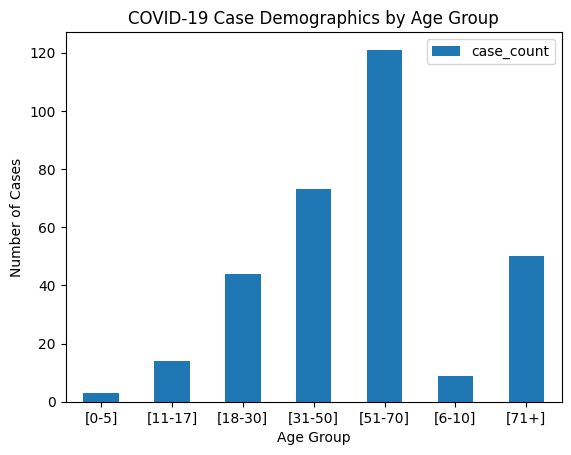

In [ ]:
age_distribution_pd = age_distribution.toPandas()
plt.figure(figsize=(8,6))
age_distribution_pd.plot(kind='bar', x='age_range')
plt.title('COVID-19 Case Demographics by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

Analysis 2: Cumulative case count of Covid between the earliest case observed in the dataset and last case observed

In [ ]:
df = spark.read.json(parsed_notes)

df = df.withColumn(
    'covid_result',
    F.lower(F.col('laboratory')['covid19']['result']).cast(StringType())
)

In [ ]:
covid_cases = df.filter(df['covid_result'].isin(['detected (qualifier value)']))
#covid_cases.show()

In [ ]:
covid_cases = covid_cases.withColumn(
    'encounter_date',
    F.to_date(F.col('encounter')['date'], 'yyyy-MM-dd')
)
#covid_cases.show()

In [ ]:
latest_case_date = covid_cases.agg(F.max('encounter_date')).collect()[0][0]
#latest_case_date.show()

In [ ]:
daily_case_counts = covid_cases.groupBy('encounter_date').count()
#daily_case_counts.show()

In [ ]:
daily_case_counts = daily_case_counts.orderBy('encounter_date')
#daily_case_counts.show()

In [ ]:
daily_case_counts = daily_case_counts.withColumn(
    'cumulative_case_count',
    F.sum('count').over(Window.orderBy('encounter_date'))
)
#daily_case_counts.show()

In [ ]:
print(f"Latest case date: {latest_case_date}")

Latest case date: 2020-05-26


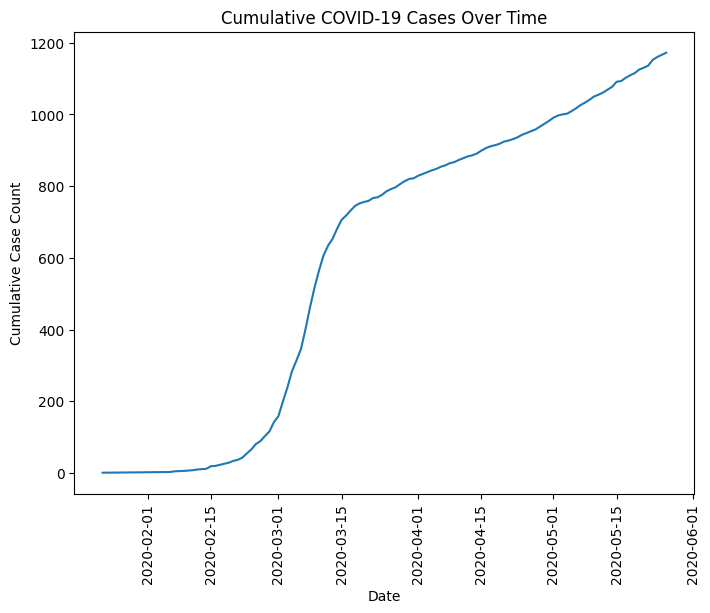

In [ ]:
daily_case_counts_pd = daily_case_counts.toPandas()
plt.figure(figsize=(8,6))
plt.plot(
    daily_case_counts_pd['encounter_date'],
    daily_case_counts_pd['cumulative_case_count'],
)
plt.title('Cumulative COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Case Count')
plt.xticks(rotation=90)
plt.show()

Analysis 3: Rank medications by frequency of prescription

In [ ]:
df = spark.read.json(parsed_notes)

medication_names = df.select(F.explode(F.col('medications')).alias('medication'))
medication_names = medication_names.select(F.col('medication.description').alias('medication_name'))
#medication_names.show()

In [ ]:
medication_counts = medication_names.groupBy('medication_name').count().withColumnRenamed('count', 'prescription_count')
medication_counts = medication_counts.orderBy(F.desc('prescription_count'))
#medication_counts.show()

In [ ]:
window_spec = Window.orderBy(F.desc('prescription_count'))
medication_counts_with_rank = medication_counts.withColumn('rank', F.row_number().over(window_spec))
medication_counts_with_rank.show()

+--------------------+------------------+----+
|     medication_name|prescription_count|rank|
+--------------------+------------------+----+
|Acetaminophen 500...|               302|   1|
|0.4 ML Enoxaparin...|               291|   2|
|1 ML Epoetin Alfa...|               214|   3|
|1 ML Enoxaparin s...|               174|   4|
|NDA020503 200 ACT...|               165|   5|
|insulin human  is...|                88|   6|
|Simvastatin 10 MG...|                83|   7|
|Hydrochlorothiazi...|                82|   8|
|24 HR Metformin h...|                69|   9|
|amLODIPine 5 MG /...|                52|  10|
|Atenolol 50 MG / ...|                50|  11|
|120 ACTUAT Flutic...|                49|  12|
|Acetaminophen 325...|                46|  13|
|Digoxin 0.125 MG ...|                36|  14|
|Verapamil Hydroch...|                36|  15|
|Warfarin Sodium 5...|                36|  16|
|Clopidogrel 75 MG...|                35|  17|
|Simvastatin 20 MG...|                31|  18|
|Amlodipine 5

Analysis 4: Analyze medication patterns across different demographic groups (e.g., top 3 per age group)


In [ ]:
df = spark.read.json(parsed_notes)
df = df.withColumn("age", F.col("demographics").getItem("age"))

df = df.withColumn("age_range",
    F.when((F.col("age") >= 0) & (F.col("age") <= 5), "[0-5]")
    .when((F.col("age") >= 6) & (F.col("age") <= 10), "[6-10]")
    .when((F.col("age") >= 11) & (F.col("age") <= 17), "[11-17]")
    .when((F.col("age") >= 18) & (F.col("age") <= 30), "[18-30]")
    .when((F.col("age") >= 31) & (F.col("age") <= 50), "[31-50]")
    .when((F.col("age") >= 51) & (F.col("age") <= 70), "[51-70]")
    .otherwise("[71+]"))

In [ ]:
medication_names = df.withColumn("medication", F.explode(F.col("medications"))).select(
    F.col("medication.description").alias("medication_name"),
    F.col("age_range")
)
#medication_names.show()

In [ ]:
medication_counts = medication_names.groupBy("age_range", "medication_name").count()
#medication_counts.show()

In [ ]:
window_spec = Window.partitionBy("age_range").orderBy(F.desc("count"))

medication_counts_with_rank = medication_counts.withColumn("rank", F.row_number().over(window_spec))
#medication_counts_with_rank.show()

In [ ]:
top_medications = medication_counts_with_rank.filter(F.col("rank") <= 3).sort("age_range")
#top_medications.show()

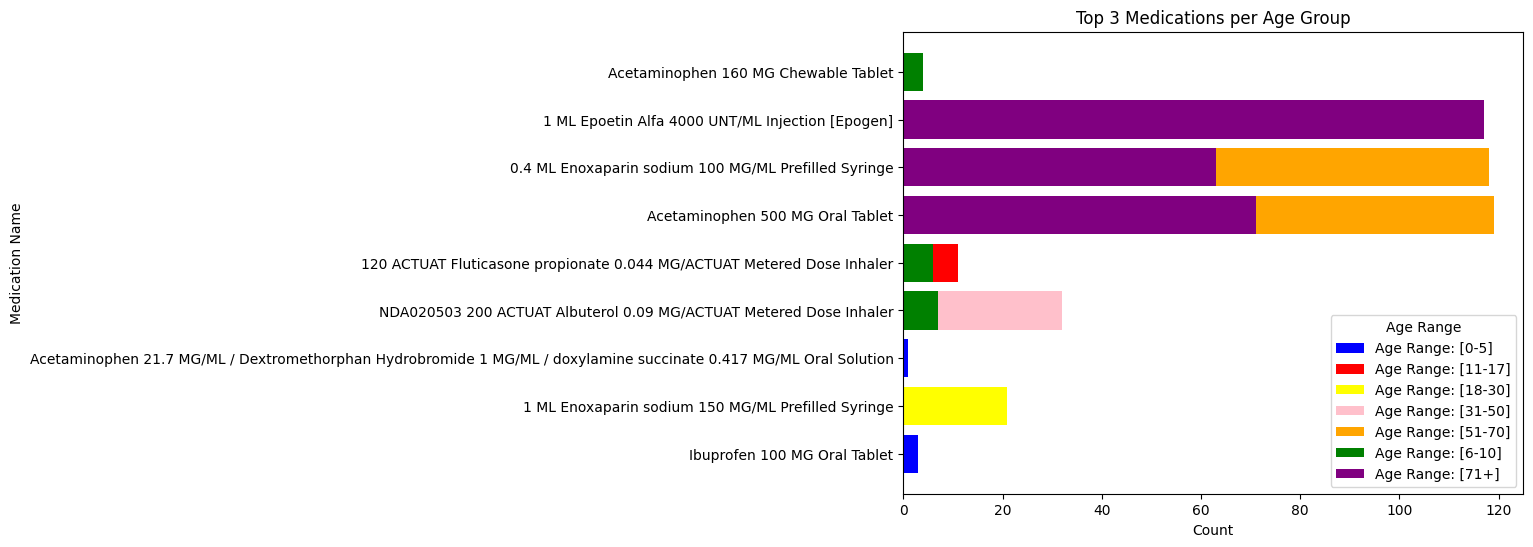

In [ ]:
top_medications_pd = top_medications.toPandas()

fig, ax = plt.subplots(figsize=(8, 6))
age_colors = {
    '[0-5]': 'blue',
    '[6-10]': 'green',
    '[11-17]': 'red',
    '[18-30]': 'yellow',
    '[31-50]': 'pink',
    '[51-70]': 'orange',
    '[71+]': 'purple'
}

for age_range in top_medications_pd['age_range'].unique():
    age_data = top_medications_pd[top_medications_pd['age_range'] == age_range]

    ax.barh(age_data['medication_name'], age_data['count'],
            label=f'Age Range: {age_range}',
            color=age_colors.get(age_range, 'gray'))

plt.xlabel('Count')
plt.ylabel('Medication Name')
plt.title('Top 3 Medications per Age Group')
plt.legend(title="Age Range")

plt.show()

Analysis 5: Identify and plot co-morbidity information from the patient records (e.g., hypertension, obesity, prediabetes, etc.) provided in the dataset.


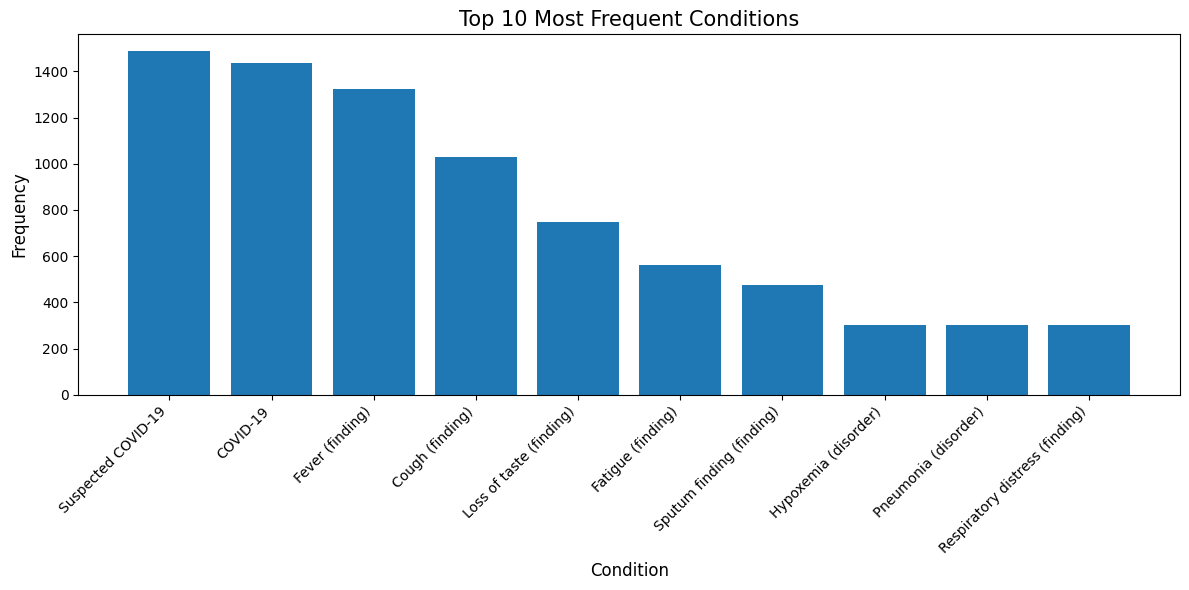

In [ ]:
# Identify and plot co-morbidity information from the patient records (e.g., hypertension, obesity, prediabetes, etc.) provided in the dataset.
from pyspark.sql.functions import explode, col, count
df = spark.read.json(parsed_notes)

conditions_df = df.select(explode(col("conditions")).alias("condition"))

# Extract description and count frequencies
condition_counts = (conditions_df
    .groupBy("condition.description")
    .count()
    .orderBy("count", ascending=False)
    .limit(10)
)

# Collect results to local list for plotting
results = condition_counts.collect()

# Prepare data for plotting
descriptions = [row['description'] for row in results]
counts = [row['count'] for row in results]

plt.figure(figsize=(12, 6))
plt.bar(descriptions, counts)
plt.title('Top 10 Most Frequent Conditions', fontsize=15)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Independent group analysis 1: 1. Correlation between insurance coverage and immunizations and procedures

I think this is valuable because insurance helps cover costs of healthcare. It also determines if an individual is willing to go to the doctors and has an impact of what immunizations and procedures they will take.


In [ ]:
# replace empty fields with "No Insurance"
df = spark.read.json(parsed_notes)
insurance_data = df.withColumn(
    "insurance_filled",
    F.when(F.col("demographics.insurance") == "", "No Insurance")
     .otherwise(F.col("demographics.insurance"))
)
#insurance_data.show()
#insurance_data.select("insurance_filled").distinct().show()

In [ ]:
processed_data = insurance_data.withColumn(
    "has_immunizations", F.size(F.col("immunizations")) > 0
).withColumn(
    "has_procedures", F.size(F.col("procedures")) > 0
)
#processed_data.select("insurance_filled", "has_immunizations", "has_procedures").show()

In [ ]:
average_data = processed_data.groupBy("insurance_filled").agg(
    F.avg(F.col("has_immunizations").cast("int")).alias("avg_immunizations"),
    F.avg(F.col("has_procedures").cast("int")).alias("avg_procedures")
)

average_data.show()

+----------------+-------------------+------------------+
|insurance_filled|avg_immunizations  |avg_procedures    |
+----------------+-------------------+------------------+
|Spouse          |0.29910714285714285|0.6964285714285714|
|No Insurance    |0.29605263157894735|0.7894736842105263|
|Self            |0.264669163545568  |0.714107365792759 |
|Unknown         |0.4513888888888889 |0.8680555555555556|
|Guardian        |0.24906367041198502|0.8389513108614233|
+----------------+-------------------+------------------+



In [ ]:
correlation_data = processed_data.select(
    F.when(F.col("insurance_filled") == "No Insurance", 0).otherwise(1).alias("has_insurance"),
    F.col("has_immunizations").cast("int"),
    F.col("has_procedures").cast("int")
)
#correlation_data.show()

In [ ]:
immunization_correlation = correlation_data.stat.corr("has_insurance", "has_immunizations")
procedure_correlation = correlation_data.stat.corr("has_insurance", "has_procedures")

print(f"Correlation between insurance and immunizations: {immunization_correlation}")
print(f"Correlation between insurance and procedures: {procedure_correlation}")

Correlation between insurance and immunizations: -0.001515394603296523
Correlation between insurance and procedures: -0.011023566078812861


Results:

Since the correlation between insurance and immunizations and procedures are really close to 0, this suggests that there is no linear relationship between having insurance and the likelihood od recieving immunizations or procedures

Independent group analysis 2:

This is examining the correlation between COVID-19, fever, fatigue, cough, and loss of taste. This is important because it allows the doctors to possibly test for COVID-19 if a patient comes in with these symptoms.

In [ ]:
# independent group analysis 2
from pyspark.sql.functions import expr
correlation_data = df.select(
        expr("IF(EXISTS(conditions, x -> x.description = 'COVID-19'), 1, 0) AS covid"),
        expr("IF(EXISTS(conditions, x -> x.description = 'Fever (finding)'), 1, 0) AS fever"),
        expr("IF(EXISTS(conditions, x -> x.description = 'Fatigue (finding)'), 1, 0) AS fatigue"),
        expr("IF(EXISTS(conditions, x -> x.description = 'Cough (finding)'), 1, 0) AS cough"),
        expr("IF(EXISTS(conditions, x -> x.description = 'Loss of taste (finding)'), 1, 0) AS loss_of_taste")
)

# Calculate correlation matrix
covid_fever = correlation_data.stat.corr("covid", "fever")
covid_fatigue = correlation_data.stat.corr("covid", "fatigue")
covid_cough = correlation_data.stat.corr("covid", "cough")
covid_loss_of_taste = correlation_data.stat.corr("covid", "loss_of_taste")

print("Correlation between COVID-19 and Fever")
print(covid_fever)
print("Correlation between COVID-19 and Fatigue")
print(covid_fatigue)
print("Correlation between COVID-19 and Cough")
print(covid_cough)
print("Correlation between COVID-19 and Loss of Taste")
print(covid_loss_of_taste)

Correlation between COVID-19 and Fever
0.7797634595534284
Correlation between COVID-19 and Fatigue
0.3514861086000061
Correlation between COVID-19 and Cough
0.5694435377895646
Correlation between COVID-19 and Loss of Taste
0.41991800994554784


We see that fever and covid-19 is most positively correlated, meaning that fever is often a symptom of having covid-19. The second most correlated one is cough, especially since covid-19 is a respiratory infection.

Independent group analysis 3:

This is examining the top 10 immunizations. This is beneficial because it demonstrates the most common immunizations taken by people and helps inform policy decisions by hospitals and medical providers to encourage their patients to take certain immunizations.

In [ ]:
# independent group analysis 3
from pyspark.sql.functions import desc
df = spark.read.json(parsed_notes)
immunization_df = df.select(explode(col("immunizations")).alias("immunization"))

# Extract the description column from the exploded immunization struct
top_immunizations = (
    immunization_df
    .select(col("immunization.description").alias("description"))
    .groupBy("description")
    .agg(count("*").alias("count"))
    .orderBy(desc("count"))
    .limit(10)
)

# Show the result
top_immunizations.show()

+--------------------+-----+
|         description|count|
+--------------------+-----+
|Influenza  season...|  550|
|Td (adult) preser...|   57|
|                DTaP|   44|
|Pneumococcal conj...|   43|
|                 IPV|   30|
| meningococcal MCV4P|   25|
|Hep B  adolescent...|   24|
|       Hib (PRP-OMP)|   24|
|   HPV  quadrivalent|   22|
|        Hep A  adult|   21|
+--------------------+-----+



We see that the most common immunization is influenza shot with the second and third being related to tetanus.